HYPER PARAMETER TUNING
parameters are initially learned from dataset,thEY are represet for model predictions.so MODEL PARAMETERS are not adjustable eg- y=mx+c,slope ccant adjust before .

Hyper parameters are adjustable based on model to get improvedmodel.eg-knn

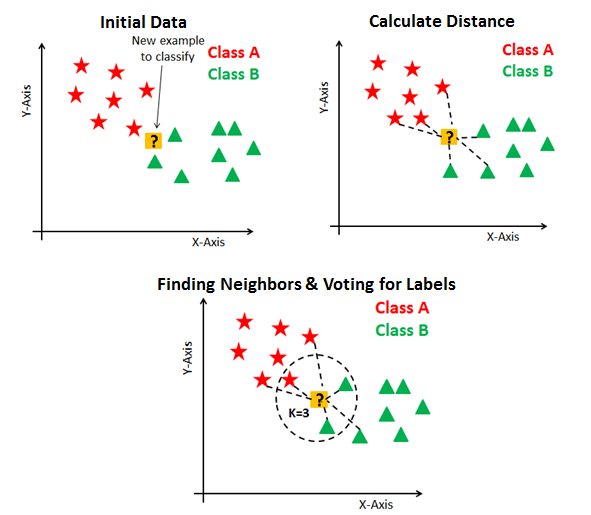

TWO GENERIC APPROACHES TO SEARCH EFFECTIVELY IN HP SPACE
1-GRID SEARCH
2-RANDOM SERCH

GRID SEARCH-
Gridsearchcv library i there to perform this,it will reducce ethe manual effort ,computationall time is more,library itself perform the search.

**EXAMPLE**
CROSS VALIDATION
to evaluate the performance of model in unseen data it usedd,
divide datasete into k folds k=1,2,3..
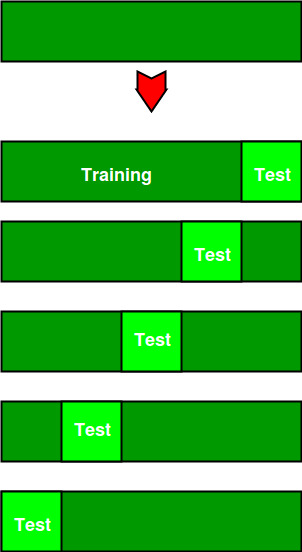.


2-RANDOM SEARCH CV
randomly take the data points and machine will choose the best one,grid search try to attempt all possible combination of hyper parameter
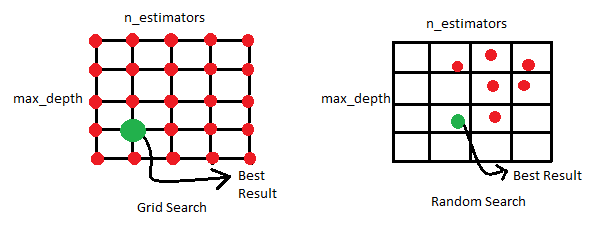

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML/hper parameter tuning/Copy_of_diabetes_(1)_(2)_(1)_(1).csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [7]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
cls= KNeighborsClassifier(n_neighbors=5)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7552083333333334

GRIDSEARCHCV


In [12]:
help(cls)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [13]:
cls1=KNeighborsClassifier()

In [14]:
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
clf=GridSearchCV(cls1,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
clf.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [19]:
clf2= KNeighborsClassifier(n_neighbors=9,weights='uniform')
clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
accuracy_score(y_test,y_pred)

0.7708333333333334

RANDOM SEARCH CV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint


In [31]:
clf= RandomForestClassifier(n_estimators=50)

In [37]:
param_dist={"max_depth":[3,4,5,6,None],
           "max_features":sp_randint(1,11),
            "min_samples_split":sp_randint(2,11),
            "criterion":["gini","entropy"]
}

In [38]:
randomCV= RandomizedSearchCV(clf,param_distributions=param_dist,cv=3)


In [39]:
randomCV.fit(x_train,y_train)
print(randomCV.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 2}


In [40]:
print(randomCV.score(x_test,y_test))

0.7864583333333334
